# Make synthetic data from the beta-binomial model and plot ABC SMC results

In [1]:
import numpy as np
import mystyle.sty as sty
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
sty.reset_plots()

# Make data from the beta-binomial model

In [3]:
N_truth = 10
p_truth = 0.6

n_data = 50

np.random.seed(5)
data = np.random.binomial(N_truth, p_truth, size=n_data)

Prior is Beta($\alpha$,$\beta$)

In [4]:
alpha = beta = 0.5

In [5]:
min(data), max(data)

(3, 10)

In [6]:
min_p_plot = 4e-4
p_space = np.linspace(min_p_plot, 1-min_p_plot, 1000)
prior = ss.beta.pdf(p_space,alpha,beta)
posterior = ss.beta.pdf(p_space,alpha + np.sum(data),beta + N_truth*n_data - np.sum(data))

In [7]:
data_bincounts = np.bincount(data)

## Load data from ABC SMC

In [8]:
theta = np.loadtxt('particles.csv', delimiter=',')

/home/juvid/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/juvid/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


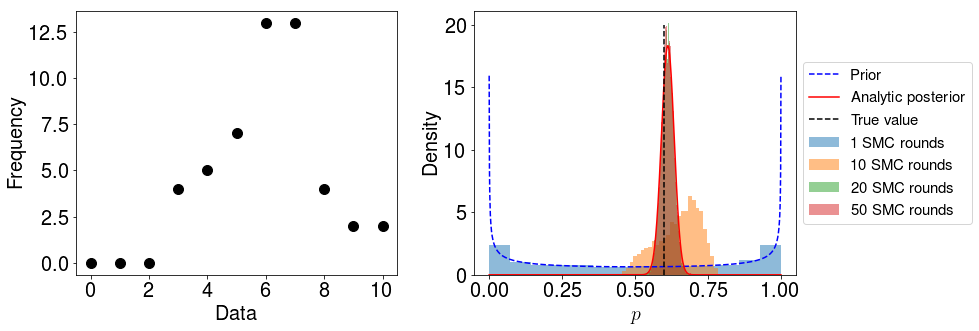

In [9]:
fig, axs = sty.plot(ncols=2, figsize=(7,5))

ax = axs[0]
ax.plot(np.arange(len(data_bincounts)), data_bincounts, 'ok')

x_ticks = np.arange(len(data_bincounts))[::2]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)
sty.remove_tex_axis(ax, ytick_fmt="%.1f", axis_remove='y')
ax.set_xlabel('$x$')
ax.set_ylabel('Frequency')
ax.set_xlabel('Data')

ax = axs[1]
ax.plot(p_space, prior, '--b', label='Prior')
ax.plot(p_space, posterior, '-r', label='Analytic posterior')
ax.plot(p_truth*np.ones(50), np.linspace(0,20), '--k', label='True value')

for i in [ 0,  9, 19, 49]:
    ax.hist(theta[:,i], bins='auto',density=True, label=str(i+1)+' SMC rounds', alpha=0.5)
ax.set_xlabel('$p$')
ax.set_ylabel('Density')
    
sty.legend_outside(ax)
sty.remove_tex_axis(ax, xtick_fmt="%.2f")

plt.tight_layout()
plt.savefig('SMC_bet_binom.pdf', bbox_inches='tight')


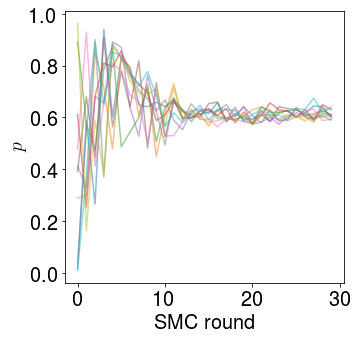

In [15]:
nmax = 30
fig, ax = sty.plot()
for i in np.random.choice(nmax, size=10, replace=False):
    ax.plot(np.arange(nmax), theta[i,:nmax],'-', alpha=0.5)
ax.set_xlabel('SMC round')
ax.set_ylabel('$p$')
sty.remove_tex_axis(ax, ytick_fmt="%.1f")